# Metrics for goodness of trees -- Local posterior probability from ASTRAL-pro and Taxonomic accuracy

In [2]:
import sys, re
import pandas as pd
import numpy as np
from skbio.tree import TreeNode
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

In [5]:
version = 2

### 41 SCG from Martinez-Gutierrez

In [6]:
dataPathIn = f'./input_data/emp/martinez_gutierrez/emp_min_markers_per_genome_1'

In [7]:
tree_martinez_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_martinez_no_min

<TreeNode, name: N1, internal node count: 773, tips count: 775>

In [8]:
df_martinez_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_martinez_no_min.shape

(773, 9)

In [9]:
dataPathIn = f'./input_data/emp/martinez_gutierrez/emp_min_markers_per_genome_10'

In [10]:
tree_martinez_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_martinez_min

<TreeNode, name: N1, internal node count: 747, tips count: 749>

In [11]:
df_martinez_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_martinez_min.shape

(747, 9)

### 57 SCG from Moody 2024

In [12]:
dataPathIn = f'./input_data/emp/moody/emp_min_markers_per_genome_1'

In [13]:
tree_moody_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_moody_no_min

<TreeNode, name: N1, internal node count: 782, tips count: 784>

In [14]:
df_moody_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_moody_no_min.shape

(782, 9)

In [15]:
dataPathIn = f'./input_data/emp/moody/emp_min_markers_per_genome_14'

In [16]:
tree_moody_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_moody_min

<TreeNode, name: N1, internal node count: 753, tips count: 755>

In [17]:
df_moody_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_moody_min.shape

(753, 9)

### 400 SCG from Phylophlan

In [18]:
dataPathIn = f'./input_data/emp/phylophlan/emp_min_marker_genes_per_genome_100'

In [19]:
tree_phylophlan_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_phylophlan_min

<TreeNode, name: N1, internal node count: 733, tips count: 735>

In [20]:
df_phylophlan_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_phylophlan_min.shape

(733, 9)

In [21]:
dataPathIn = f'./input_data/emp/phylophlan/emp_min_marker_genes_per_genome_1'
tree_phylophlan_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_phylophlan_no_min

<TreeNode, name: N1, internal node count: 791, tips count: 793>

In [22]:
df_phylophlan_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_phylophlan_no_min.shape

(791, 9)

### 136 SCG from Amphora

In [23]:
dataPathIn = f'./input_data/emp/amphora2/emp_min_marker_genes_per_genome_34'

In [24]:
tree_amphora_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_amphora_min

<TreeNode, name: N1, internal node count: 303, tips count: 305>

In [25]:
df_amphora_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_amphora_min.shape

(303, 9)

In [26]:
dataPathIn = f'./input_data/emp/amphora2/emp_min_marker_genes_per_genome_1'
tree_amphora_no_min = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
tree_amphora_no_min

<TreeNode, name: N1, internal node count: 776, tips count: 778>

In [27]:
df_amphora_no_min = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
df_amphora_no_min.shape

(776, 9)

### Marker genes selected with our method--EggNog

In [28]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
versions = [2, 3]
matrices = ['presence_absence_copies']
th_copy = 1.0

In [29]:
%%time
trees_eggnog_no_min = {}
metadata_eggnog_no_min = {}
for k in ks:
    for p in ps:
        for matrix in matrices:
            for version in versions:
                combination = f'k_{k}_p_{p}/{matrix}' 
                dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{th_copy}/no_min_marker_genes_per_genome/{combination}'
                try:
                    metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
                    trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
                except:
                    # print(combination)
                    print(f'\t{combination}. Cannot be loaded. Error in outgroup')

CPU times: user 6.21 s, sys: 45 ms, total: 6.25 s
Wall time: 6.28 s


In [30]:
%%time
trees_eggnog_min = {}
metadata_eggnog_min = {}
for k in ks:
    for p in ps:
        for matrix in matrices:
            for version in versions:
                combination = f'k_{k}_p_{p}/{matrix}' 
                dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{th_copy}/min_marker_genes_per_genome/{combination}'
                try:
                    metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
                    trees_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
                except:
                    # print(combination)
                    print(f'\t{combination}. Cannot be loaded. Error in outgroup')

CPU times: user 5.8 s, sys: 44.4 ms, total: 5.84 s
Wall time: 5.87 s


### Marker genes selected with our method--KEGG

In [31]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
ps = [0]
versions = [2, 3]
matrices = ['presence_absence_copies']
th_copy = 1.0

In [32]:
%%time
trees_kegg_no_min = {}
metadata_kegg_no_min = {}
for k in ks:
    for p in ps:
        for matrix in matrices:
            for version in versions:
                combination = f'k_{k}_p_{p}/{matrix}' 
                dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{th_copy}/no_min_marker_genes_per_genome/{combination}'
                try:
                    metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
                    trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
                except:
                    # print(combination)
                    print(f'\t{combination}. Cannot be loaded. Error in outgroup')

CPU times: user 6.19 s, sys: 47.8 ms, total: 6.24 s
Wall time: 6.27 s


In [33]:
%%time
trees_kegg_min = {}
metadata_kegg_min = {}
for k in ks:
    for p in ps:
        for matrix in matrices:
            for version in versions:
                combination = f'k_{k}_p_{p}/{matrix}' 
                dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{th_copy}/min_marker_genes_per_genome/{combination}'
                try:
                    metadata_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)
                    trees_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'] = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
                except:
                    # print(combination)
                    print(f'\t{combination}. Cannot be loaded. Error in outgroup')

CPU times: user 5.45 s, sys: 40.1 ms, total: 5.49 s
Wall time: 5.51 s


# Figures

In [34]:
version = 2

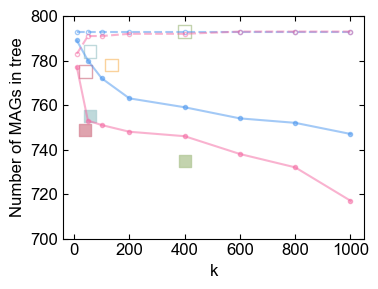

In [35]:
plt.figure(figsize = (3.95, 3.05))

# Eggnog
y_eggnog_no_min = []
y_eggnog_min = []
for k in ks:
    y_eggnog_no_min.append(trees_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'].count(tips = True))
    y_eggnog_min.append(trees_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'].count(tips = True))
plt.plot(ks, y_eggnog_no_min, alpha = 0.5, marker = '.', color = '#4895ef', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_eggnog_min, alpha = 0.5, marker = '.', color = '#4895ef', label = 'EggNog', ls = 'solid')

# KEGG
y_kegg_no_min = []
y_kegg_min = []
for k in ks:
    y_kegg_no_min.append(trees_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'].count(tips = True))
    y_kegg_min.append(trees_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}'].count(tips = True))
plt.plot(ks, y_kegg_no_min, alpha = 0.5, marker = '.', color = '#f467a1', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_kegg_min, alpha = 0.5, marker = '.', color = '#f467a1', label = 'KEGG', ls = 'solid')


plt.scatter(41, tree_martinez_no_min.count(tips = True), color = '#d88c9a', marker = 's', alpha = 0.8,
            facecolor = 'none', s = 80)
plt.scatter(41, tree_martinez_min.count(tips = True), color = '#d88c9a', marker = 's',
            alpha = 0.8, label = 'Martinez', s = 80)

plt.scatter(57, tree_moody_no_min.count(tips = True), color = '#b0d0d3', marker = 's', 
            alpha = 0.8, facecolor = 'none', s = 80)
plt.scatter(57, tree_moody_min.count(tips = True), color = '#b0d0d3', marker = 's', 
            alpha = 0.8, label = 'Moody', s = 80)

plt.scatter(400, tree_phylophlan_min.count(tips = True), color = '#b5c99a',
            marker = 's', alpha = 0.8, label = 'Phylophlan3', s = 80)
plt.scatter(400, tree_phylophlan_no_min.count(tips = True), color = '#b5c99a',
            marker = 's', alpha = 0.8, facecolor = 'none', s = 80)

plt.scatter(136, tree_amphora_min.count(tips = True), color = '#f9c784',
            marker = 's', alpha = 0.8, label = 'Amphora2', s = 80)
plt.scatter(136, tree_amphora_no_min.count(tips = True), color = '#f9c784',
            marker = 's', alpha = 0.8, facecolor = 'none', s = 80)

# plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left', ncol = 2)
plt.xlabel('k')
plt.ylabel('Number of MAGs in tree')
plt.ylim(700, 800)
# plt.yscale('log')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S5B.svg')
plt.show()

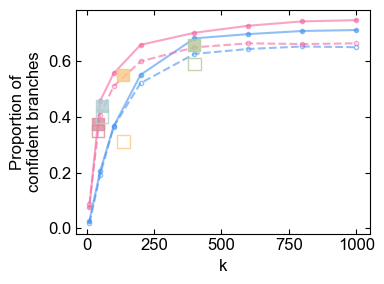

In [36]:
plt.figure(figsize = (4, 3))

# Eggnog
y_eggnog_no_min = []
y_eggnog_min = []
for k in ks:
    datum_eggnog_no_min = metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    y_eggnog_no_min.append(np.sum(datum_eggnog_no_min >= 0.95) / len(datum_eggnog_no_min))
    y_eggnog_min.append(np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min))
plt.plot(ks, y_eggnog_no_min, alpha = 0.6, marker = '.', color = '#4895ef', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_eggnog_min, alpha = 0.6, marker = '.', color = '#4895ef', label = 'EggNog', ls = 'solid')

# KEGG
y_kegg_no_min = []
y_kegg_min = []
for k in ks:
    datum_kegg_no_min = metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    y_kegg_no_min.append(np.sum(datum_kegg_no_min >= 0.95) / len(datum_kegg_no_min))
    y_kegg_min.append(np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min))
plt.plot(ks, y_kegg_no_min, alpha = 0.6, marker = '.', color = '#f467a1', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_kegg_min, alpha = 0.6, marker = '.', color = '#f467a1', label = 'KEGG', ls = 'solid')

    

datum_martinez = df_martinez_no_min['pp1'].values
plt.scatter(41, np.sum(datum_martinez >= 0.95) / len(datum_martinez), color = '#d88c9a', marker = 's', alpha = 0.8,
            facecolor = 'none', s = 80, zorder = 2)
datum_martinez_min = df_martinez_min['pp1'].values
plt.scatter(41, np.sum(datum_martinez_min >= 0.95) / len(datum_martinez_min), color = '#d88c9a', marker = 's',
            alpha = 0.8, label = 'Martinez', s = 80, zorder = 2)


datum_moody = df_moody_no_min['pp1'].values
plt.scatter(57, np.sum(datum_moody >= 0.95) / len(datum_moody), color = '#b0d0d3', marker = 's', 
            alpha = 0.8, facecolor = 'none', s = 80, zorder = 2)
datum_moody_min = df_moody_min['pp1'].values
plt.scatter(57, np.sum(datum_moody_min >= 0.95) / len(datum_moody_min), color = '#b0d0d3', marker = 's', 
            alpha = 0.8, label = 'Moody', s = 80, zorder = 2)

datum_phylophlan_min = df_phylophlan_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min), color = '#b5c99a',
            marker = 's', alpha = 0.8, label = 'Phylophlan3', s = 80, zorder = 2)
datum_phylophlan_no_min = df_phylophlan_no_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_no_min >= 0.95) / len(datum_phylophlan_no_min), color = '#b5c99a',
            marker = 's', alpha = 0.8, facecolor = 'none', s= 80, zorder = 2)

datum_amphora_min = df_amphora_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), color = '#f9c784',
            marker = 's', alpha = 0.8, label = 'Amphora2', s= 80, zorder = 2)
datum_amphora_no_min = df_amphora_no_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_no_min >= 0.95) / len(datum_amphora_no_min), color = '#f9c784',
            marker = 's', alpha = 0.8, facecolor = 'none', s = 80, zorder = 2)


plt.xlabel('k')
plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
# plt.savefig(f'./figures/figure_4A.svg')
plt.show()

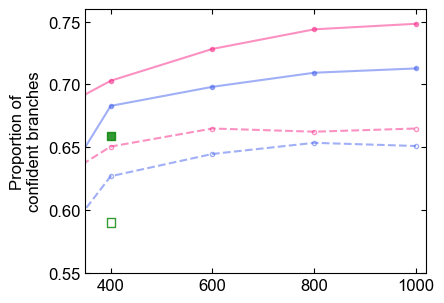

In [37]:
plt.figure(figsize = (4.6, 3.2))

# Eggnog
y_eggnog_no_min = []
y_eggnog_min = []
for k in ks:
    datum_eggnog_no_min = metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    y_eggnog_no_min.append(np.sum(datum_eggnog_no_min >= 0.95) / len(datum_eggnog_no_min))
    y_eggnog_min.append(np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min))
plt.plot(ks, y_eggnog_no_min, alpha = 0.5, marker = '.', color = '#4361ee', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_eggnog_min, alpha = 0.5, marker = '.', color = '#4361ee', label = 'EggNog', ls = 'solid')

# KEGG
y_kegg_no_min = []
y_kegg_min = []
for k in ks:
    datum_kegg_no_min = metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    y_kegg_no_min.append(np.sum(datum_kegg_no_min >= 0.95) / len(datum_kegg_no_min))
    y_kegg_min.append(np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min))
plt.plot(ks, y_kegg_no_min, alpha = 0.5, marker = '.', color = '#f72585', ls = 'dashed',
        markerfacecolor = 'none')
plt.plot(ks, y_kegg_min, alpha = 0.5, marker = '.', color = '#f72585', label = 'KEGG', ls = 'solid')

    

datum_martinez = df_martinez_no_min['pp1'].values
plt.scatter(41, np.sum(datum_martinez >= 0.95) / len(datum_martinez), color = 'r', marker = 's', alpha = 0.8,
            facecolor = 'none')
datum_martinez_min = df_martinez_min['pp1'].values
plt.scatter(41, np.sum(datum_martinez_min >= 0.95) / len(datum_martinez_min), color = 'r', marker = 's',
            alpha = 0.8, label = 'Martinez')


datum_moody = df_moody_no_min['pp1'].values
plt.scatter(57, np.sum(datum_moody >= 0.95) / len(datum_moody), color = 'b', marker = 's', 
            alpha = 0.8, facecolor = 'none')
datum_moody_min = df_moody_min['pp1'].values
plt.scatter(57, np.sum(datum_moody_min >= 0.95) / len(datum_moody_min), color = 'b', marker = 's', 
            alpha = 0.8, label = 'Moody')
datum_phylophlan_min = df_phylophlan_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min), color = 'g',
            marker = 's', alpha = 0.8, label = 'Phylophlan3')
datum_phylophlan_no_min = df_phylophlan_no_min['pp1'].values
plt.scatter(400, np.sum(datum_phylophlan_no_min >= 0.95) / len(datum_phylophlan_no_min), color = 'g',
            marker = 's', alpha = 0.8, facecolor = 'none')

datum_amphora_min = df_amphora_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), color = 'orange',
            marker = 's', alpha = 0.8, label = 'Amphora2')
datum_amphora_no_min = df_amphora_no_min['pp1'].values
plt.scatter(136, np.sum(datum_amphora_no_min >= 0.95) / len(datum_amphora_no_min), color = 'orange',
            marker = 's', alpha = 0.8, facecolor = 'none')


plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.ylim(0.55, 0.76)
plt.xlim(350, 1020)
# plt.savefig(f'./figures/figure_4A_inset.svg')
plt.show()

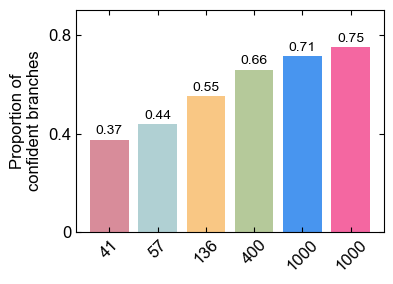

In [38]:
# Barplot
k = 1000
p = 0
x = np.arange(6)
colors = ['#d88c9a', '#b0d0d3', '#f9c784', '#b5c99a', '#4895ef', '#f467a1']

datum_martinez_min = df_martinez_min['pp1'].values # Martinez-Gutierrez
datum_moody_min = df_moody_min['pp1'].values # Moody
datum_phylophlan_min = df_phylophlan_min['pp1'].values # Phylophlan
datum_amphora_min = df_amphora_min['pp1'].values # Amphora
datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values # KEGG
datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values #EggNOG
data_barplot = [np.sum(datum_martinez_min >= 0.95) / len(datum_martinez_min), np.sum(datum_moody_min >= 0.95) / len(datum_moody_min),
            np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min),
            np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min), np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min)]

plt.figure(figsize = (4.1, 3))
plt.bar(x, data_barplot, color = colors)
# Add text annotation on top of bars
for i, v in enumerate(data_barplot):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.xticks(x, labels = ['41', '57', '136', '400', '1000', '1000'], rotation = 45, ha='center')
# Cutomize y axis ticks labels
plt.yticks([0, 0.4, 0.8], [0, 0.4, 0.8])
plt.ylim(0, 0.9)
# plt.xlabel('k')
plt.ylabel('Proportion of\nconfident branches')
# plt.savefig(f'./figures/figure_4A_inset.svg')
plt.show()

Alternative visualization

In [39]:
# Data
p = 0
matrix = 'presence_absence_copies'
ks_previous = [41, 57, 136, 400]
datum_martinez_no_min = df_martinez_no_min['pp1'].values
datum_martinez_min = df_martinez_min['pp1'].values
datum_moody_no_min = df_moody_no_min['pp1'].values
datum_moody_min = df_moody_min['pp1'].values
datum_phylophlan_min = df_phylophlan_min['pp1'].values
datum_phylophlan_no_min = df_phylophlan_no_min['pp1'].values
datum_amphora_min = df_amphora_min['pp1'].values
datum_amphora_no_min = df_amphora_no_min['pp1'].values
lpps_previous_min = [np.sum(datum_martinez_min >= 0.95) / len(datum_martinez_min), np.sum(datum_moody_min >= 0.95) / len(datum_moody_min),
         np.sum(datum_amphora_min >= 0.95) / len(datum_amphora_min), np.sum(datum_phylophlan_min >= 0.95) / len(datum_phylophlan_min)]
lpps_previous_no_min = [np.sum(datum_martinez_no_min >= 0.95) / len(datum_martinez_no_min), np.sum(datum_moody_no_min >= 0.95) / len(datum_moody_no_min),
            np.sum(datum_amphora_no_min >= 0.95) / len(datum_amphora_no_min), np.sum(datum_phylophlan_no_min >= 0.95) / len(datum_phylophlan_no_min)]
ks_kegg_eggnog = [10, 50, 100, 200, 400, 600, 800, 1000]
lpps_kegg_min = []
lpps_kegg_no_min = []
lpps_eggnog_min = []
lpps_eggnog_no_min = []
for k in ks_kegg_eggnog:
    datum_kegg_min = metadata_kegg_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_kegg_no_min = metadata_kegg_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_eggnog_min = metadata_eggnog_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    datum_eggnog_no_min = metadata_eggnog_no_min[f'k_{k}_p_{p}_{matrix}_ap_{version}']['pp1'].values
    lpps_kegg_min.append(np.sum(datum_kegg_min >= 0.95) / len(datum_kegg_min))
    lpps_kegg_no_min.append(np.sum(datum_kegg_no_min >= 0.95) / len(datum_kegg_no_min))
    lpps_eggnog_min.append(np.sum(datum_eggnog_min >= 0.95) / len(datum_eggnog_min))
    lpps_eggnog_no_min.append(np.sum(datum_eggnog_no_min >= 0.95) / len(datum_eggnog_no_min))

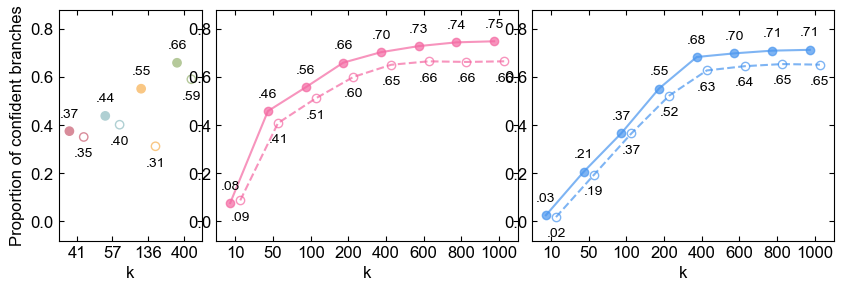

In [40]:
# Create a figure
fig = plt.figure(figsize=(10, 3))
offset = 0.4

# Define GridSpec with specific width ratios
gs = fig.add_gridspec(1, 5, width_ratios=[3, 3, 3, 3, 3], wspace = 0.1)

# Plot 1
ax0 = fig.add_subplot(gs[0, 0])
x = np.arange(4) * 2
ax0.scatter(x - offset, lpps_previous_min, color = ['#d88c9a', '#b0d0d3', '#f9c784', '#b5c99a'])
ax0.scatter(x + offset, lpps_previous_no_min, color = ['#d88c9a', '#b0d0d3', '#f9c784', '#b5c99a'],
            facecolor = 'none')
# Add text annotations
for i, xs in enumerate(x):
    ax0.text(xs - offset, lpps_previous_min[i] + 0.07, f'{lpps_previous_min[i] % 1:.2f}'[1:], 
            ha='center', va='center', fontsize=10)
    ax0.text(xs + offset, lpps_previous_no_min[i] - 0.07, f'{lpps_previous_no_min[i] % 1:.2f}'[1:],
            ha='center', va='center', fontsize=10)
ax0.set_xticks(x, ks_previous)
ax0.set_xlabel('k')
ax0.set_ylabel('Proportion of confident branches')
ax0.set_ylim(-0.08, 0.88)
ax0.set_xlim(-1, 7)
ax0.tick_params(top = True, right = True, direction = 'in', which = 'both')

# Plot 2
ax1 = fig.add_subplot(gs[0, 1:3], sharey = ax0)
x = np.arange(8) * 3
ax1.plot(x - offset, lpps_kegg_min, marker = 'o', color = '#f467a1', alpha = 0.7)
ax1.plot(x + offset, lpps_kegg_no_min, marker = 'o', color = '#f467a1',
        ls = 'dashed', markerfacecolor = 'none', alpha = 0.7)
# Add text annotations
for i, xs in enumerate(x):
    ax1.text(xs - offset, lpps_kegg_min[i] + 0.07, f'{lpps_kegg_min[i] % 1:.2f}'[1:], 
            ha='center', va='center', fontsize=10)
    ax1.text(xs + offset, lpps_kegg_no_min[i] - 0.07, f'{lpps_kegg_no_min[i] % 1:.2f}'[1:],
            ha='center', va='center', fontsize=10)
ax1.set_xticks(x, ks_kegg_eggnog)
# ax1.set_yticklabels([])
ax1.set_xlabel('k')
ax1.tick_params(top = True, right = True, direction = 'in', which = 'both')

# Plot 3
ax1 = fig.add_subplot(gs[0, 3:], sharey = ax0)
x = np.arange(8) * 3
ax1.plot(x - offset, lpps_eggnog_min, marker = 'o', color = '#4895ef', alpha = 0.7)
ax1.plot(x + offset, lpps_eggnog_no_min, marker = 'o', color = '#4895ef',
        ls = 'dashed', markerfacecolor = 'none', alpha = 0.7)
# Add text annotations
for i, xs in enumerate(x):
    ax1.text(xs - offset, lpps_eggnog_min[i] + 0.07, f'{lpps_eggnog_min[i] % 1:.2f}'[1:], 
            ha='center', va='center', fontsize=10)
    ax1.text(xs + offset, lpps_eggnog_no_min[i] - 0.07, f'{lpps_eggnog_no_min[i] % 1:.2f}'[1:],
            ha='center', va='center', fontsize=10)
ax1.set_xticks(x, ks_kegg_eggnog)
# ax1.set_yticklabels([])
ax1.set_xlabel('k')
ax1.tick_params(top = True, right = True, direction = 'in', which = 'both')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(f'./figures/figure_4A_alt.svg')
plt.show()

## Impact of copy number (measured as bitscore)

Load data

In [39]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 1.0
version = 2
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
tree_kegg_bs_1 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_1 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [40]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.98
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min/{combination}'
tree_kegg_bs_098 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_098 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [41]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.95
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min/{combination}'
tree_kegg_bs_095 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_095 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [42]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.9
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min/{combination}'
tree_kegg_bs_09 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_09 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [43]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.5
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min/{combination}'
tree_kegg_bs_05 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_05 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [44]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.0
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/kegg/bit_score_threshold_{threshold}/no_min/{combination}'
tree_kegg_bs_0 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_kegg_bs_0 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [45]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 1.0
version = 2
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min_marker_genes_per_genome/{combination}'
tree_eggnog_bs_1 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_1 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [46]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.98
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min/{combination}'
tree_eggnog_bs_098 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_098 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [47]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.95
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min/{combination}'
tree_eggnog_bs_095 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_095 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [48]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.9
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min/{combination}'
tree_eggnog_bs_09 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_09 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [49]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.5
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min/{combination}'
tree_eggnog_bs_05 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_05 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

In [50]:
k, p, matrix = 400, 0, 'presence_absence_copies'
threshold = 0.0
combination = f'k_{k}_p_{p}/{matrix}' 
dataPathIn = f'./input_data/emp/eggnog/bit_score_threshold_{threshold}/no_min/{combination}'
tree_eggnog_bs_0 = TreeNode.read(f'{dataPathIn}/nid_astral-pro{version}.nwk')
df_eggnog_bs_0 = pd.read_table(f'{dataPathIn}/metadata_astral-pro{version}.tsv', index_col = 0)

Figures

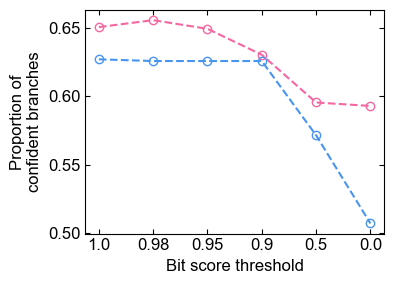

In [51]:
plt.figure(figsize = (4.1, 3))
k = 400
p = 0
datum_kegg_bs_1 = df_kegg_bs_1['pp1'].values
datum_kegg_bs_098 = df_kegg_bs_098['pp1'].values
datum_kegg_bs_095 = df_kegg_bs_095['pp1'].values
datum_kegg_bs_09 = df_kegg_bs_09['pp1'].values
datum_kegg_bs_05 = df_kegg_bs_05['pp1'].values
datum_kegg_bs_0 = df_kegg_bs_0['pp1'].values
y = [np.sum(datum_kegg_bs_1 >= 0.95) / len(datum_kegg_bs_1),
    np.sum(datum_kegg_bs_098 >= 0.95) / len(datum_kegg_bs_098),
     np.sum(datum_kegg_bs_095 >= 0.95) / len(datum_kegg_bs_095),
     np.sum(datum_kegg_bs_09 >= 0.95) / len(datum_kegg_bs_09),
    np.sum(datum_kegg_bs_05 >= 0.95) / len(datum_kegg_bs_05),
    np.sum(datum_kegg_bs_0 >= 0.95) / len(datum_kegg_bs_0)]
x = np.arange(len(y))
plt.plot(x, y, marker = 'o', color = '#f467a1', label = 'KEGG', ls = 'dashed', markerfacecolor = 'none')

datum_eggnog_bs_1 = df_eggnog_bs_1['pp1'].values
datum_eggnog_bs_098 = df_eggnog_bs_095['pp1'].values
datum_eggnog_bs_095 = df_eggnog_bs_095['pp1'].values
datum_eggnog_bs_09 = df_eggnog_bs_09['pp1'].values
datum_eggnog_bs_05 = df_eggnog_bs_05['pp1'].values
datum_eggnog_bs_0 = df_eggnog_bs_0['pp1'].values
y = [np.sum(datum_eggnog_bs_1 >= 0.95) / len(datum_eggnog_bs_1),
    np.sum(datum_eggnog_bs_098 >= 0.95) / len(datum_eggnog_bs_098),
     np.sum(datum_eggnog_bs_095 >= 0.95) / len(datum_eggnog_bs_095),
     np.sum(datum_eggnog_bs_09 >= 0.95) / len(datum_eggnog_bs_09),
     np.sum(datum_eggnog_bs_05 >= 0.95) / len(datum_eggnog_bs_05),
    np.sum(datum_eggnog_bs_0 >= 0.95) / len(datum_eggnog_bs_0)]
plt.plot(x, y, marker = 'o', color = '#4895ef', label = 'EggNog', ls = 'dashed', markerfacecolor = 'none')   

plt.xticks(x, labels = [1.0, 0.98, 0.95, 0.9, 0.5, 0.0])
plt.xlabel('Bit score threshold')
plt.ylabel('Proportion of\nconfident branches')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S5A_lpp.svg')
plt.show()

In [52]:
# order: bs_1, bs_098, bs_095, bs_09, bs_05, bs_0
# Calculated during marker selection: as adj_mod2[list(all_genes)].sum()
number_genes_kegg = np.array([212810, 216800, 221975, 231122, 276235, 283418])
number_genes_eggnog = np.array([238231, 244085, 253850, 272207, 418600, 561910])

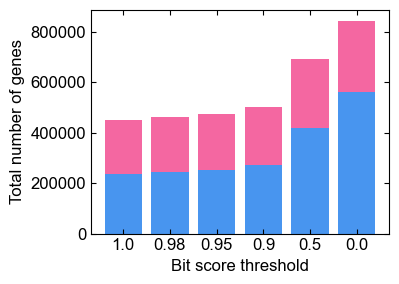

In [53]:
plt.figure(figsize = (4.15, 3))
x = [0, 1, 2, 3, 4, 5]
plt.bar(x, number_genes_eggnog, color = '#4895ef')
plt.bar(x, number_genes_kegg, bottom = number_genes_eggnog, color = '#f467a1')
plt.xticks(x, labels = [1.0, 0.98, 0.95, 0.9, 0.5, 0.0])
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.xlabel('Bit score threshold')
plt.ylabel('Total number of genes')
# plt.savefig(f'./figures/figure_S5A_copy_number.svg')
plt.show()